In [ ]:
#1- Single Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/camscanner/carprediction(1).csv")
df1=df.sample(10)
d=df1[['Engine_HP','MSRP']]
d
d.to_csv("prediction.csv",index=False)


In [ ]:
df2= pd.read_csv('/content/prediction.csv')
df2

,Engine_HP,MSRP
0,370.0,89400
1,420.0,96100
2,157.0,22270
3,202.0,37340
4,274.0,29300
5,220.0,30890
6,278.0,32765
7,300.0,36090
8,287.0,30025
9,310.0,29645


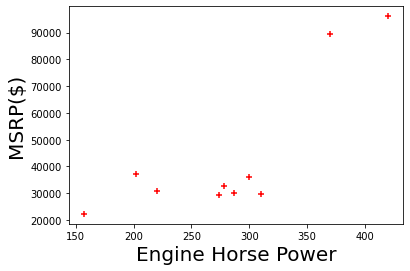

In [ ]:
%matplotlib inline
plt.xlabel('Engine Horse Power',fontsize=20)
plt.ylabel('MSRP($)',fontsize=20)
plt.scatter(df2.Engine_HP,df2.MSRP, color='red',marker='+')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df2[['Engine_HP']],df2.MSRP)

LinearRegression()

In [ ]:
reg.predict([[250]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34649.40073808])

In [ ]:
reg.coef_

array([274.62576295])

In [ ]:
reg.intercept_

-34007.04000029704

In [ ]:
274.62576295*250+-34007.04000029704

34649.40073720296

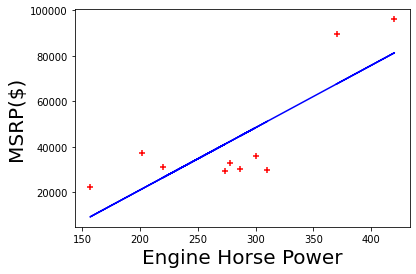

In [ ]:
%matplotlib inline
plt.xlabel('Engine Horse Power',fontsize=20)
plt.ylabel('MSRP($)',fontsize=20)
plt.scatter(df2.Engine_HP,df2.MSRP, color='red',marker='+')
plt.plot(df2.Engine_HP,reg.predict(df2[['Engine_HP']]),color='blue')

In [ ]:
nd = pd.read_csv('/content/drive/MyDrive/camscanner/HP.csv')
nd

,Engine_HP
0,200
1,250
2,300
3,350
4,400
5,450
6,500


In [ ]:
p = reg.predict(nd)

In [ ]:
nd['price'] = p
nd

,Engine_HP,price
0,200,20918.112590
1,250,34649.400738
2,300,48380.688886
3,350,62111.977033
4,400,75843.265181
5,450,89574.553329
6,500,103305.841476


In [ ]:
nd.to_csv("new_prediction.csv",index = False)

In [ ]:
#2-Multiple Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n
import math

In [ ]:
!pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=1e03c07494abd970991aa17d062d0f97be71232890fcc032325ec97c71128a44
  Stored in directory: /root/.cache/pip/wheels/cb/f3/5a/d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


In [ ]:
print(w2n.word_to_num("two million three thousand nine hundred and eighty four"))

2003984


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/camscanner/hiring.csv')
data

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
ts_median = data.test_score.median()
#if value is in point
#ts_median = math.floor(data.test_score.median())
ts_median

8.0

In [ ]:
data.test_score = data.test_score.fillna(ts_median)
data

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
data.experience = data.experience.fillna("zero")
data

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
data.experience=data.experience.apply(w2n.word_to_num)

In [ ]:
data

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg1 = linear_model.LinearRegression()
reg1.fit(data[['experience','test_score','interview_score']],data.salary)

LinearRegression()

In [ ]:
reg1.predict([[1,5,10]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51831.14992722])

In [ ]:
reg1.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [ ]:
reg1.intercept_

17737.263464337688

In [ ]:
2812.95487627*1+1845.70596798*5+2205.24017467*10+17737.263464337688

51831.14992720769

In [ ]:
reg1.predict([[2,9,6]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [ ]:
reg1.predict([[12,10,10]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])